In [1]:
#Step1: Importing libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

In [3]:
#Step2: Read car image and convert to RGB

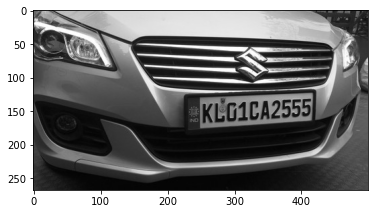

In [4]:
img = cv2.imread('./car_0.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [5]:
#Step3: Reduce noise and detect edges

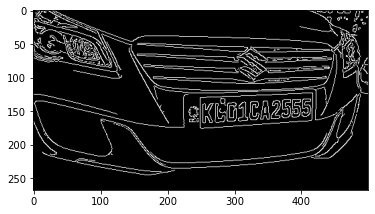

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [7]:
#Step4: Detecting the object (Number plate) using contours

In [8]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [9]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [10]:

location

array([[[417, 123]],

       [[249, 130]],

       [[249, 175]],

       [[415, 164]]], dtype=int32)

In [11]:

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

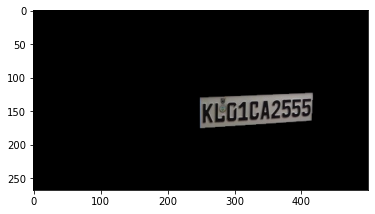

In [12]:

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [13]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

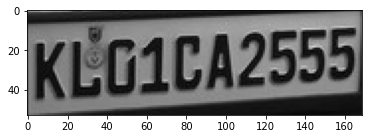

In [14]:

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [15]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\USER\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.5244985964854458)]

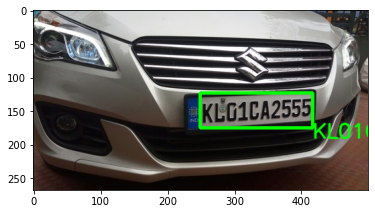

In [16]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [17]:
#Car regisytraion number:

In [18]:
text

'KL01CA2555'

In [ ]:
#Get Your Vechile details

In [ ]:
http://13.232.75.81/

In [ ]:
import requests
import xmltodict
import json

In [ ]:
def get_vehicle_info(plate_number):
    r = requests.get("https://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={0}&username=tnm9o".format(str(plate_number)))
    data = xmltodict.parse(r.content)
    jdata = json.dumps(data)
    df = json.loads(jdata)
    df1 = json.loads(df['Vehicle']['vehicleJson'])
    return df1

In [ ]:

if len(text) > 10:
    text = text[-10:]
    print(text)

In [ ]:
get_vehicle_info(text)